# 분석 사례 1

NCSOFT 사내 식당 주문 기록
"어느 코너에 줄을 서야 할까?"


In [1]:
import pandas

식당 주문 기록 엑셀파일 읽어오기

In [19]:
restaurant = pandas.read_excel('share/data/food_order.xlsx')

In [20]:
restaurant[:3]

,date,dine_type,corner,menu,is_sold_out,use_count,pred_count,additional,good,ok,bad,diff_use_pred,year,month,day,wday
0,2013-08-06,dinner,grill & fry,훈제연어벤또(200개),F,213,0,0,0,0,0,-213,2013,8,6,1
1,2013-08-06,dinner,rice & soup 1,뚝배기 우거지 갈비탕,F,261,0,0,0,0,0,-261,2013,8,6,1
2,2013-08-06,lunch,noodle bar,판모밀정식,F,267,0,0,0,0,0,-267,2013,8,6,1


In [7]:
restaurant[-3:]

,date,dine_type,corner,menu,is_sold_out,use_count,pred_count,additional,good,ok,bad,diff_use_pred,year,month,day,wday
6822,2015-07-27,breakfast,take out,샌드위치콤보&음료&과일,F,58,0,0,0,0,0,-58,2015,7,27,0
6823,2015-07-27,lunch,noodle bar,김치비빔국수,F,202,0,0,0,0,0,-202,2015,7,27,0
6824,2015-07-27,lunch,take out,닭가슴살크랜베리샐러드,F,304,0,0,0,0,0,-304,2015,7,27,0


In [8]:
type(restaurant)

pandas.core.frame.DataFrame

주문 기록에서 특정한 날짜나 날짜 범위를 선택하고 싶다면?
예) 2014년 9월

In [22]:
restaurant = restaurant.set_index('date')

In [25]:
restaurant2014 = restaurant.ix['2014']

In [26]:
restaurant2014.to_excel('식당 주문 2014.xlsx')

열이 너무 많다! 원하는 열만 선택하기

In [39]:
columnSelect = ['menu', 'corner', 'dine_type', 'use_count']
restaurant = restaurant[columnSelect]

In [68]:
restaurant[:3]

,date,메뉴,코너,시간대,주문수량
0,2013-08-06,훈제연어벤또(200개),grill & fry,dinner,213
1,2013-08-06,뚝배기 우거지 갈비탕,rice & soup 1,dinner,261
2,2013-08-06,판모밀정식,noodle bar,lunch,267


In [71]:
restaurant[['메뉴', '코너']]

,메뉴,코너
0,훈제연어벤또(200개),grill & fry
1,뚝배기 우거지 갈비탕,rice & soup 1
2,판모밀정식,noodle bar
3,설렁탕정식,rice & soup 1
4,A. 부대찌개정식,rice & soup 1
5,차슈라멘,noodle bar
6,뚝배기순대국,rice & soup 1
7,A:누룽지장각백숙,rice & soup 1
8,유니자장면,noodle bar
9,김치날치알밥,rice & soup 1


열 제목 변경


In [46]:
columnName = {'menu': '메뉴', 'corner':'코너', 'use_count': '주문수량', 'dine_type': '시간대'}

In [47]:
restaurant.rename(columns=columnName)[:3]

,메뉴,코너,시간대,주문수량
date,,,,
2013-08-06,훈제연어벤또(200개),grill & fry,dinner,213
2013-08-06,뚝배기 우거지 갈비탕,rice & soup 1,dinner,261
2013-08-06,판모밀정식,noodle bar,lunch,267


In [50]:
restaurant = restaurant.rename(columns=columnName)

In [52]:
restaurant[:3]

,메뉴,코너,시간대,주문수량
date,,,,
2013-08-06,훈제연어벤또(200개),grill & fry,dinner,213
2013-08-06,뚝배기 우거지 갈비탕,rice & soup 1,dinner,261
2013-08-06,판모밀정식,noodle bar,lunch,267


정리한 결과가 마음에 든다면 중간 결과를 저장해 두는 것이 도움이 됨! (엑셀이나 파일 등으로)

In [57]:
restaurant.to_excel('식당.xlsx')

In [84]:
restaurant = pandas.read_excel('식당.xlsx')
restaurant[:3]

,date,메뉴,코너,시간대,주문수량
0,2013-08-06,훈제연어벤또(200개),grill & fry,dinner,213
1,2013-08-06,뚝배기 우거지 갈비탕,rice & soup 1,dinner,261
2,2013-08-06,판모밀정식,noodle bar,lunch,267


In [63]:
test =restaurant.set_index(['date', '메뉴'])

In [74]:
test.ix[['2014']['판모밀정식']]

TypeError: list indices must be integers, not str

In [85]:
restaurant = restaurant.set_index('date')
restaurant[:3]

,메뉴,코너,시간대,주문수량
date,,,,
2013-08-06,훈제연어벤또(200개),grill & fry,dinner,213
2013-08-06,뚝배기 우거지 갈비탕,rice & soup 1,dinner,261
2013-08-06,판모밀정식,noodle bar,lunch,267


어느 코너가 어느 시간에 인기가 많을 까?

1. 각 코너별 시간대별 주문수량의 평균


In [87]:
restaurant.pivot_table('주문수량', index='코너', columns='시간대')

시간대,breakfast,dinner,lunch
코너,,,
after school,NaN,127.143469,154.848485
burger&pizza,NaN,117.764967,170.175325
grill & fry,NaN,186.026144,265.366953
noodle bar,NaN,122.383772,234.766595
rice & soup 1,52.449580,217.696203,397.233051
rice & soup 2,NaN,NaN,241.897590
take out,46.452381,256.149675,270.598253


In [90]:
코너별시간대별_주문평균 = restaurant.pivot_table('주문수량', index='코너', columns='시간대')

aggfunc= 집계함수

In [108]:
restaurant.pivot_table('주문수량', index='코너', columns='시간대', aggfunc='std')

시간대,breakfast,dinner,lunch
코너,,,
after school,NaN,38.145514,39.363466
burger&pizza,NaN,41.510242,61.168783
grill & fry,NaN,57.439577,60.255803
noodle bar,NaN,59.579550,55.577645
rice & soup 1,13.762328,74.420329,156.330373
rice & soup 2,NaN,NaN,67.651107
take out,16.326020,166.217149,37.746711


코너별 합계가 궁금할때!

In [97]:
열선택 =['breakfast', 'lunch', 'dinner']
코너별시간대별_주문평균 = 코너별시간대별_주문평균[열선택]

각 시간대별 합계

In [99]:
코너별시간대별_주문평균.sum() # default 열단위

시간대
breakfast      98.901961
lunch        1734.886252
dinner       1027.164229
dtype: float64

In [101]:
코너별시간대별_주문평균.sum(axis=1) # 줄단위

코너
after school     281.991954
burger&pizza     287.940291
grill & fry      451.393097
noodle bar       357.150367
rice & soup 1    667.378833
rice & soup 2    241.897590
take out         573.200309
dtype: float64

In [103]:
코너별시간대별_주문평균['합계'] = 코너별시간대별_주문평균.sum(axis=1)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [104]:
코너별시간대별_주문평균

시간대,breakfast,lunch,dinner,합계
코너,,,,
after school,NaN,154.848485,127.143469,563.983908
burger&pizza,NaN,170.175325,117.764967,575.880583
grill & fry,NaN,265.366953,186.026144,902.786193
noodle bar,NaN,234.766595,122.383772,714.300734
rice & soup 1,52.449580,397.233051,217.696203,1334.757666
rice & soup 2,NaN,241.897590,NaN,483.795181
take out,46.452381,270.598253,256.149675,1146.400618


In [105]:
코너별시간대별_주문평균.sort_values(by='합계')

시간대,breakfast,lunch,dinner,합계
코너,,,,
rice & soup 2,NaN,241.897590,NaN,483.795181
after school,NaN,154.848485,127.143469,563.983908
burger&pizza,NaN,170.175325,117.764967,575.880583
noodle bar,NaN,234.766595,122.383772,714.300734
grill & fry,NaN,265.366953,186.026144,902.786193
take out,46.452381,270.598253,256.149675,1146.400618
rice & soup 1,52.449580,397.233051,217.696203,1334.757666


In [109]:
코너별시간대별_주문평균.sort_values(by='합계', ascending=False)

시간대,breakfast,lunch,dinner,합계
코너,,,,
rice & soup 1,52.449580,397.233051,217.696203,1334.757666
take out,46.452381,270.598253,256.149675,1146.400618
grill & fry,NaN,265.366953,186.026144,902.786193
noodle bar,NaN,234.766595,122.383772,714.300734
burger&pizza,NaN,170.175325,117.764967,575.880583
after school,NaN,154.848485,127.143469,563.983908
rice & soup 2,NaN,241.897590,NaN,483.795181


그래프로 출력해서 보면 더 잘보임

In [110]:
%matplotlib inline

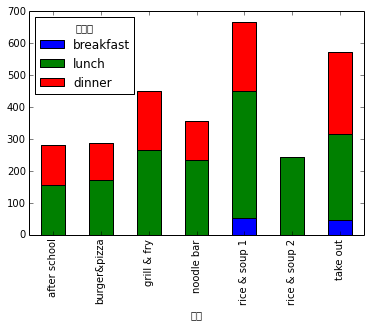

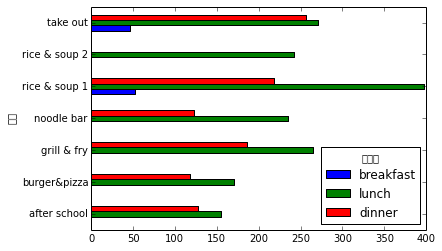

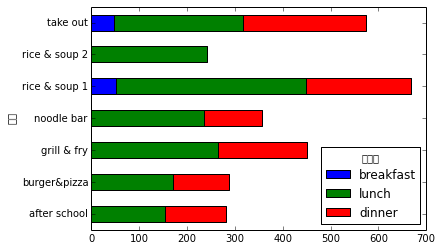

In [116]:
열선택 =['breakfast', 'lunch', 'dinner']
코너별시간대별_주문평균[열선택].plot(kind='bar', stacked=True)
코너별시간대별_주문평균[열선택].plot(kind='barh')
코너별시간대별_주문평균[열선택].plot(kind='barh', stacked=True)

In [118]:
코너별시간대별_주문평균.to_excel('코너별시간대별_주문평균.xlsx')

In [120]:
restaurant.reset_index()

,date,메뉴,코너,시간대,주문수량
0,2013-08-06,훈제연어벤또(200개),grill & fry,dinner,213
1,2013-08-06,뚝배기 우거지 갈비탕,rice & soup 1,dinner,261
2,2013-08-06,판모밀정식,noodle bar,lunch,267
3,2013-08-06,설렁탕정식,rice & soup 1,breakfast,1
4,2013-08-06,A. 부대찌개정식,rice & soup 1,lunch,376
5,2013-08-12,차슈라멘,noodle bar,dinner,179
6,2013-08-12,뚝배기순대국,rice & soup 1,breakfast,26
7,2013-08-12,A:누룽지장각백숙,rice & soup 1,lunch,504
8,2013-08-12,유니자장면,noodle bar,lunch,167
9,2013-08-12,김치날치알밥,rice & soup 1,dinner,216


In [122]:
restaurant.set_index(['date', '메뉴'])

KeyError: 'date'